In [1]:
%pylab
%matplotlib inline

params = {'text.usetex' : True,
          'font.size' : 12,
          'font.family' : 'lmodern',
          'text.latex.unicode' : True}
rcParams.update(params)

from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


<center><h1>Modal Decompositions</h1></center>
<center><h2>Proper Orthogonal Decomposition (POD) and Dynamic Mode Decomposition (DMD)</h2></center>

<br/>

<p><center>Jean-Christophe Loiseau, MdC, Arts et Métiers ParisTech</center></p>

Le but de ce TP est de vous familiariser avec la *décomposition orthogonale aux valeurs propres* (POD) et la *décomposition en modes dynamiques* (DMD). Pour cela, un ensemble de champs de vitesse issus d'une simulation de l'écoulement autour d'un cylindre bi-dimensionel à Reynolds $Re=100$ vous a été fourni pendant le cours.

## Décomposition orthogonale aux valeurs propres

La décomposition orthogonale aux valeurs propres, aussi connue sous le nom de *Proper Orthogonal Decomposition* (POD), est l'une des méthodes de décomposition modale les plus connues et les plus utilisées. Pour plus détails concernant cette méthode, réferrez-vous au notebook de cours.

Le but de cette première partie du TP sera de coder les deux versions de la POD vues en cours:

- la POD basée sur une décomposition aux valeurs singulières de la matrices de snapshots,
- la snapshots-based POD introduite par Sirovich, L. (1987). *Turbulence and the dynamics of coherent structures.* I. Coherent structures. Quarterly of applied mathematics, 45(3), 561-571.

Dans un premier temps, il est nécessaire d'écrire une fonction nous permettant de lire les snapshots fournis.

In [2]:
#--> Import scipy function to read the input snapshots.
from scipy.io import loadmat
import glob

X = []
for snapshot_path in glob.glob("Snapshots/*.mat"):
    X.append(loadmat(snapshot_path)['velocity'])

#--> Transform the list of snapshots into a data matrix.
X = asarray(X)

#-->
X = X[::4]

Maintenant que les différents snapshots ont été chargé, calculons le champ de vitesse moyen.

In [3]:
#--> Compute the mean flow.
mean_flow = X.mean(axis=0)

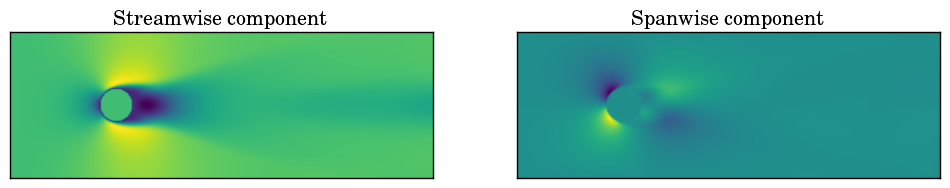

In [4]:
#--> Plot the streamwise and spanwise velocity fields.
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(mean_flow[0].T, cmap=cm.viridis)
ax[1].imshow(mean_flow[1].T, cmap=cm.viridis)

ax[0].xaxis.set_visible(False) ; ax[0].yaxis.set_visible(False)
ax[1].xaxis.set_visible(False) ; ax[1].yaxis.set_visible(False)

ax[0].set_title('Streamwise component')
ax[1].set_title('Spanwise component')

### La POD comme une décomposition aux valeurs singulières

Nous avons vu en cours que d'un point de vue mathématique, la POD pouvait être vue comme une décomposition aux valeurs singulière.

In [5]:
#--> Reshape the data matrix into one big matrix. Each column correspond to one snapshot.
X = X.ravel().reshape((X.shape[0], -1)).T

#--> Remove the mean flow to have a zero-mean data matrix.
X = X - mean_flow.reshape(-1, 1)

In [6]:
#--> Perform the singular value decomposition of X
from scipy.linalg import svd
%time u, s, vh = svd(X, full_matrices=False)

CPU times: user 11.8 s, sys: 678 ms, total: 12.5 s
Wall time: 7.1 s


Et voilà! Regardons maintenant le nombre de vecteur singuliers nécessaires pour reconstruire une approximation de faible rang.

In [7]:
#--> Calcul du % de variance expliquée à l'aide des n premières valeurs singulières.
explained = zeros_like(s)
explained[0] = s[0]

for i in range(s.size-1):
    explained[i+1] = sqrt((s[:i+2]**2).sum())

explained /= sqrt((s**2).sum())
explained *= 100.

(70, 100)

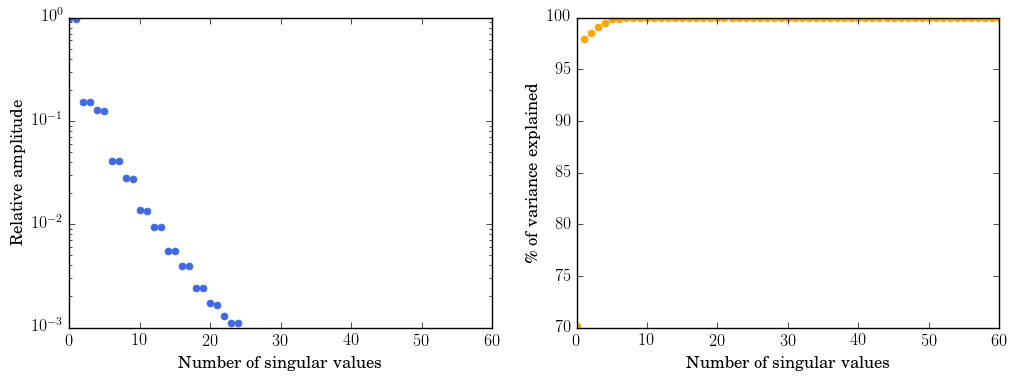

In [8]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4)) ;
ax[0].semilogy(s/s.max(), '.', color='royalblue', ms=10) 
ax[1].plot(explained, '.', color='orange', ms=10)

ax[0].set_xlim(0, 60)
ax[0].set_ylabel('Relative amplitude')
ax[0].set_xlabel('Number of singular values')
ax[0].set_ylim(10**-3, 1)
ax[0].set_yticks([10**-3, 10**-2, 10**-1, 1])

ax[1].set_ylabel('\% of variance explained')
ax[1].set_xlabel('Number of singular values')
ax[1].set_ylim(70, 100)

On voit très clairement sur le graphique de droite que les deux premières dyades permettent de constuire une approximation de faible rang reconstruisant plus de 95% de la dynamique initiale.

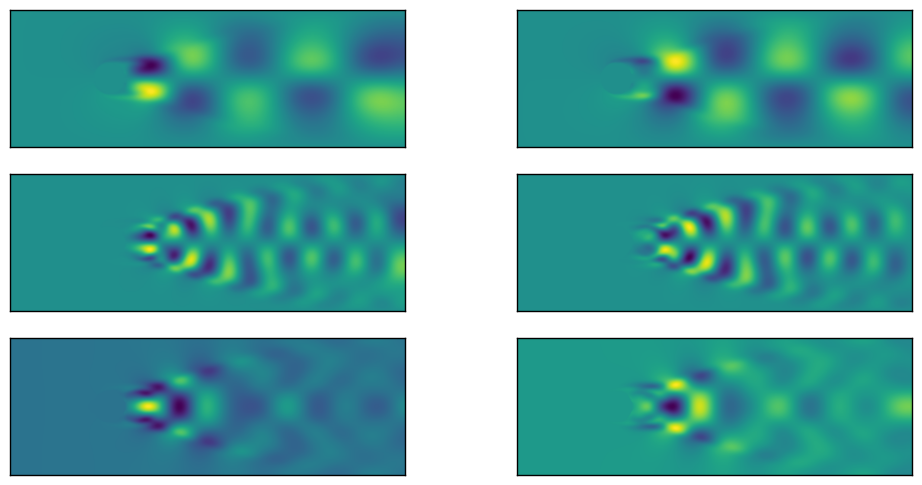

In [9]:
#--> Trace la composante de vitesse longitudinale des six premiers modes POD.
fig, ax = plt.subplots(3, 2, figsize=(12, 6))
ax[0, 0].imshow(u[:, 0].reshape(mean_flow.shape)[0].T, cmap=plt.cm.viridis) ; ax[0, 0].xaxis.set_visible(False) ; ax[0, 0].yaxis.set_visible(False)
ax[0, 1].imshow(u[:, 1].reshape(mean_flow.shape)[0].T, cmap=plt.cm.viridis) ; ax[0, 1].xaxis.set_visible(False) ; ax[0, 1].yaxis.set_visible(False)
ax[1, 0].imshow(u[:, 2].reshape(mean_flow.shape)[0].T, cmap=plt.cm.viridis) ; ax[1, 0].xaxis.set_visible(False) ; ax[1, 0].yaxis.set_visible(False)
ax[1, 1].imshow(u[:, 3].reshape(mean_flow.shape)[0].T, cmap=plt.cm.viridis) ; ax[1, 1].xaxis.set_visible(False) ; ax[1, 1].yaxis.set_visible(False)
ax[2, 0].imshow(u[:, 4].reshape(mean_flow.shape)[0].T, cmap=plt.cm.viridis) ; ax[2, 0].xaxis.set_visible(False) ; ax[2, 0].yaxis.set_visible(False)
ax[2, 1].imshow(u[:, 5].reshape(mean_flow.shape)[0].T, cmap=plt.cm.viridis) ; ax[2, 1].xaxis.set_visible(False) ; ax[2, 1].yaxis.set_visible(False)

Très clairement, les deux premiers modes POD correspondent aux structures tourbillonaires anti-symétriques observées dans l'allée tourbillonaire de von Kármán.

### Snapshots-based POD

Bien que simple à coder, calculer les modes POD via une décomposition aux valeurs singulières s'avère relativement coûteux en terme de temps de calcul comme vu dans l'exemple précédent. Attachons-nous maintenant à présenter la méthode des snapshots.

In [10]:
%%time
#--> Calcul de la matrice des corrélations temporelles.
C = (X.T).dot(X)

#--> Calcul des valeurs propres et vecteurs propres de C.
from scipy.linalg import eigh
eigenvalues, eigenvectors = eigh(C)

#--> Ensure that even machine-zero eigenvalues are positive.
eigenvalues = abs(eigenvalues)

#--> Flip the eigenvalues for ordering.
eigenvalues = flipud(eigenvalues)
eigenvectors = fliplr(eigenvectors)

#--> Normalisation des vecteurs propres.
from scipy.linalg import norm
for i in xrange(eigenvalues.size):
    eigenvectors[:, i] /= norm(eigenvalues[i]*eigenvectors[:, i], ord=2)
    
#--> Calcul des modes POD.
pod_modes = X.dot(eigenvectors)

CPU times: user 2.94 s, sys: 156 ms, total: 3.1 s
Wall time: 1.59 s


In [11]:
#--> Calcul du % de variance expliquée à l'aide des n premières valeurs singulières.
explained = zeros_like(eigenvalues)
explained[0] = sqrt(eigenvalues[0])

for i in range(eigenvalues.size-1):
    explained[i+1] = sqrt((eigenvalues[:i+2]).sum())

explained /= sqrt((eigenvalues).sum())
explained *= 100.

(70, 100)

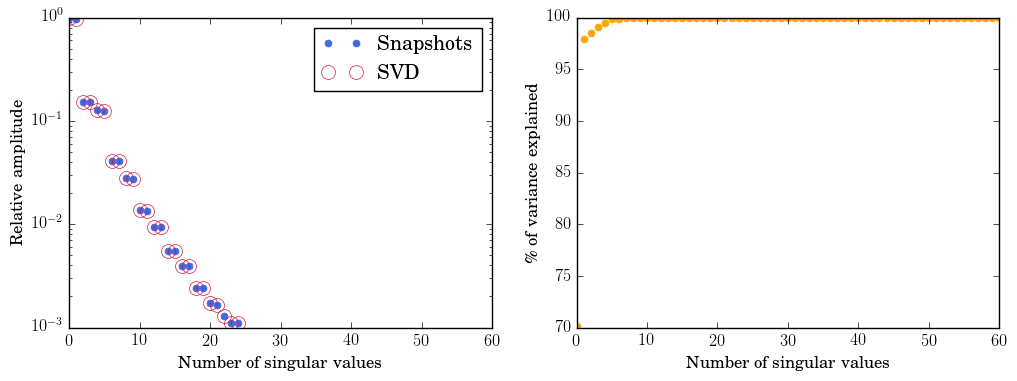

In [12]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4)) ;
ax[0].semilogy(sqrt(eigenvalues)/sqrt(eigenvalues.max()), '.', color='royalblue', ms=10, label='Snapshots')
ax[0].semilogy(s/s.max(), 'o', mfc='None', mec='crimson', ms=10, label='SVD')
ax[0].legend(loc=0)
ax[1].plot(explained, '.', color='orange', ms=10)

ax[0].set_xlim(0, 60)
ax[0].set_ylabel('Relative amplitude')
ax[0].set_xlabel('Number of singular values')
ax[0].set_ylim(10**-3, 1)
ax[0].set_yticks([10**-3, 10**-2, 10**-1, 1])

ax[1].set_ylabel('\% of variance explained')
ax[1].set_xlabel('Number of singular values')
ax[1].set_ylim(70, 100)

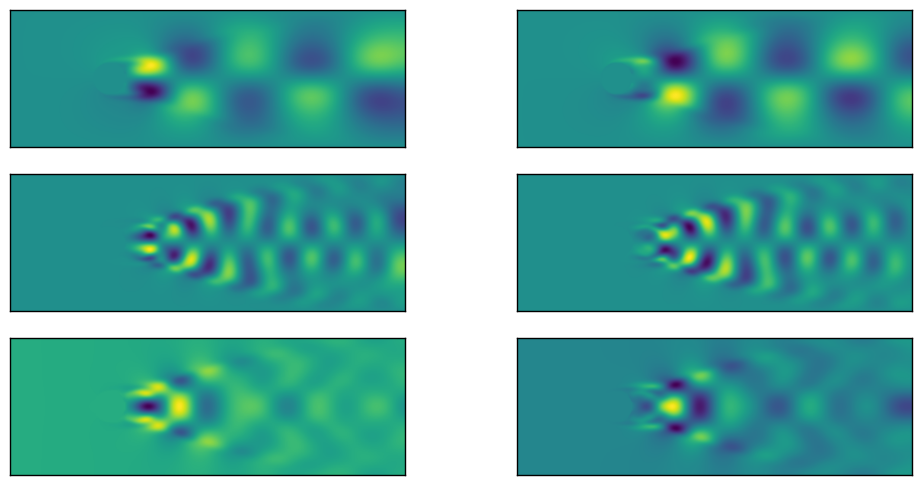

In [13]:
#--> Trace la composante de vitesse longitudinale des six premiers modes POD.
fig, ax = plt.subplots(3, 2, figsize=(12, 6))
ax[0, 0].imshow(pod_modes[:, 0].reshape(mean_flow.shape)[0].T, cmap=plt.cm.viridis) ; ax[0, 0].xaxis.set_visible(False) ; ax[0, 0].yaxis.set_visible(False)
ax[0, 1].imshow(pod_modes[:, 1].reshape(mean_flow.shape)[0].T, cmap=plt.cm.viridis) ; ax[0, 1].xaxis.set_visible(False) ; ax[0, 1].yaxis.set_visible(False)
ax[1, 0].imshow(pod_modes[:, 2].reshape(mean_flow.shape)[0].T, cmap=plt.cm.viridis) ; ax[1, 0].xaxis.set_visible(False) ; ax[1, 0].yaxis.set_visible(False)
ax[1, 1].imshow(pod_modes[:, 3].reshape(mean_flow.shape)[0].T, cmap=plt.cm.viridis) ; ax[1, 1].xaxis.set_visible(False) ; ax[1, 1].yaxis.set_visible(False)
ax[2, 0].imshow(pod_modes[:, 4].reshape(mean_flow.shape)[0].T, cmap=plt.cm.viridis) ; ax[2, 0].xaxis.set_visible(False) ; ax[2, 0].yaxis.set_visible(False)
ax[2, 1].imshow(pod_modes[:, 5].reshape(mean_flow.shape)[0].T, cmap=plt.cm.viridis) ; ax[2, 1].xaxis.set_visible(False) ; ax[2, 1].yaxis.set_visible(False)

Comme vous pouvez le voir, la méthode des snapshots nous donne exactement le même résultat que la méthode basée sur la SVD. En comparant les temps de calcul, on se rencontre néanmoins que la méthode des snapshots s'avère être beaucoup plus rapide.

## Dynamic Mode Decomposition et modes de Koopman



In [14]:
#--> Add back the mean flow to the snapshots matrix for the DMD analysis
X += mean_flow.reshape(-1, 1)

### Algorithm by Rowley *et al.*, JFM 2010.

In [36]:
%%time
#--> Computation of x(n+1) = Xc where c is the least-square solution (see course)
from numpy.linalg import lstsq
A = (X[:, :-1].T).dot(X[:, :-1])
b = (X[:, :-1].T).dot(X[:, -1])
c = lstsq(A, b)[0]

#--> Computation of the Companion matrix.
from scipy.linalg import companion
C = companion(concatenate(([1], c)))
#--> Needs to re-order the companion because of slightly different definition.
C[:, -1] = c
C[0, :-1] = 0.

#--> Calcul des valeurs propres et vecteurs propres de C.
from scipy.linalg import eig
eigenvalues, eigenvectors = eig(C)

#--> Calcul des modes de Koopman.
koopman_modes = X[:, :-1].dot(eigenvectors)

CPU times: user 10.3 s, sys: 4.24 s, total: 14.6 s
Wall time: 10.6 s


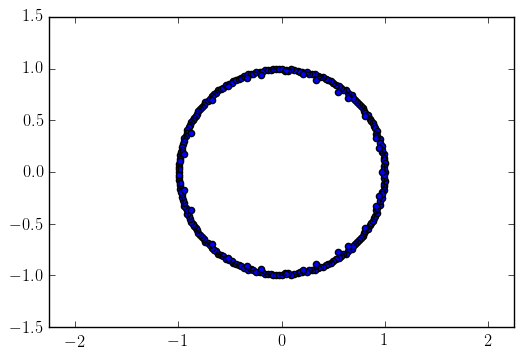

In [37]:
#--> Naive plot the Koopman eigenspectrum.
scatter(eigenvalues.real, eigenvalues.imag)
axis('equal')
theta = linspace(0, 2*pi)
plot(cos(theta), sin(theta), 'k--')

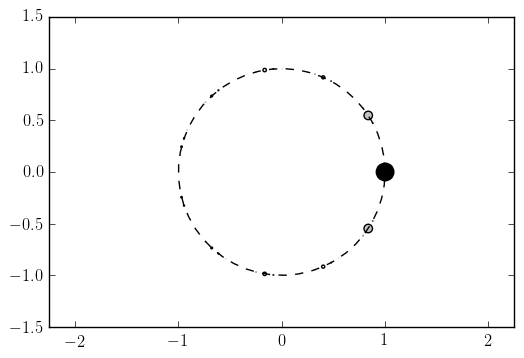

In [38]:
#--> Compute the amplitudes of the Koopman modes.
amplitude = diag((koopman_modes.T.conj()).dot(koopman_modes)).real
amplitude = sqrt(amplitude)

#--> Plotting the eigenspectrum as a function of the mode's amplitude.
scatter(eigenvalues.real, eigenvalues.imag, s=amplitude, c=amplitude, cmap=plt.cm.gray_r)
axis('equal')
theta = linspace(0, 2*pi)
plot(cos(theta), sin(theta), 'k--')


Blablabla

In [39]:
#--> Sort the Koopman modes based on their amplitude.
ind = argsort(-amplitude)
amplitude = amplitude[ind]
eigenvalues = eigenvalues[ind]
eigenvectors = eigenvectors[:, ind]
koopman_modes = koopman_modes[:, ind]

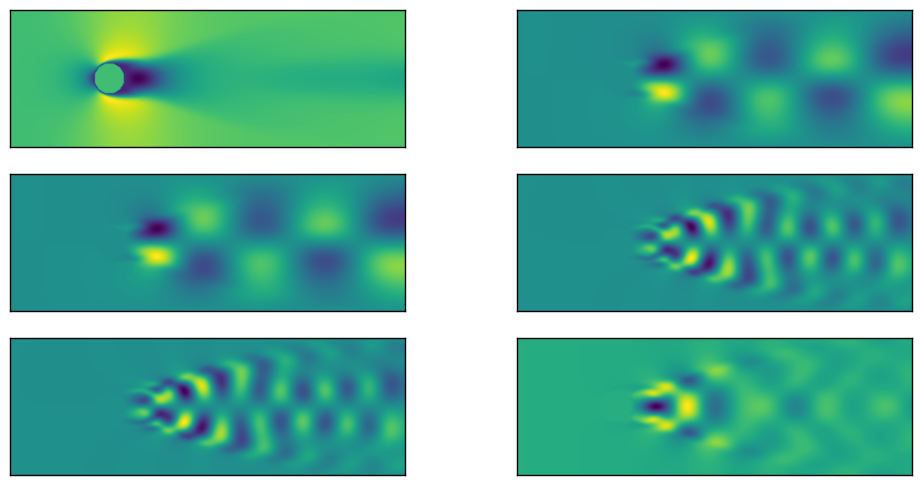

In [40]:
#--> Trace la composante de vitesse longitudinale des six premiers modes POD.
fig, ax = plt.subplots(3, 2, figsize=(12, 6))
ax[0, 0].imshow(koopman_modes[:, 0].reshape(mean_flow.shape)[0].T.real, cmap=plt.cm.viridis) ; ax[0, 0].xaxis.set_visible(False) ; ax[0, 0].yaxis.set_visible(False)
ax[0, 1].imshow(koopman_modes[:, 1].reshape(mean_flow.shape)[0].T.real, cmap=plt.cm.viridis) ; ax[0, 1].xaxis.set_visible(False) ; ax[0, 1].yaxis.set_visible(False)
ax[1, 0].imshow(koopman_modes[:, 2].reshape(mean_flow.shape)[0].T.real, cmap=plt.cm.viridis) ; ax[1, 0].xaxis.set_visible(False) ; ax[1, 0].yaxis.set_visible(False)
ax[1, 1].imshow(koopman_modes[:, 3].reshape(mean_flow.shape)[0].T.real, cmap=plt.cm.viridis) ; ax[1, 1].xaxis.set_visible(False) ; ax[1, 1].yaxis.set_visible(False)
ax[2, 0].imshow(koopman_modes[:, 4].reshape(mean_flow.shape)[0].T.real, cmap=plt.cm.viridis) ; ax[2, 0].xaxis.set_visible(False) ; ax[2, 0].yaxis.set_visible(False)
ax[2, 1].imshow(koopman_modes[:, 5].reshape(mean_flow.shape)[0].T.real, cmap=plt.cm.viridis) ; ax[2, 1].xaxis.set_visible(False) ; ax[2, 1].yaxis.set_visible(False)

### Dynamic Mode Decomposition

In [72]:
%%time
#--> Compute the SVD of the snapshots matrix.
u, s, vh = svd(X[:, :-1], full_matrices=False)

#--> Calcul du % de variance expliquée à l'aide des n premières valeurs singulières.
explained = zeros_like(s)
explained[0] = sqrt(s[0]**2)

for i in range(s.size-1):
    explained[i+1] = sqrt((s[:i+2]**2).sum())

explained /= sqrt((s**2).sum())

nmax = argwhere(explained>0.9995)[0]

#--> Low-rank approximation
u = u[:, :nmax+1]
s = s[:nmax+1]
vh = vh[:nmax+1, :]

#--> Construct the low-dimensional Koopman operator.
from scipy.linalg import diagsvd
S = (u.T).dot(X[:, 1:]).dot(vh.T).dot(diagsvd(1./s, s.size, s.size))

#--> Compute the eigendecomposition of S.
mu, vec = eig(S)

#--> Compute the DMD modes.
dmd_modes = u.dot(vec)

/Users/loiseau/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/loiseau/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/loiseau/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


CPU times: user 13.7 s, sys: 2.08 s, total: 15.8 s
Wall time: 10.3 s


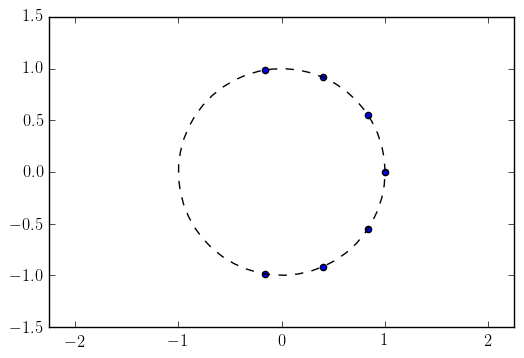

In [71]:
#--> Naive plot the Koopman eigenspectrum.
scatter(mu.real, mu.imag)
axis('equal')
theta = linspace(0, 2*pi)
plot(cos(theta), sin(theta), 'k--')

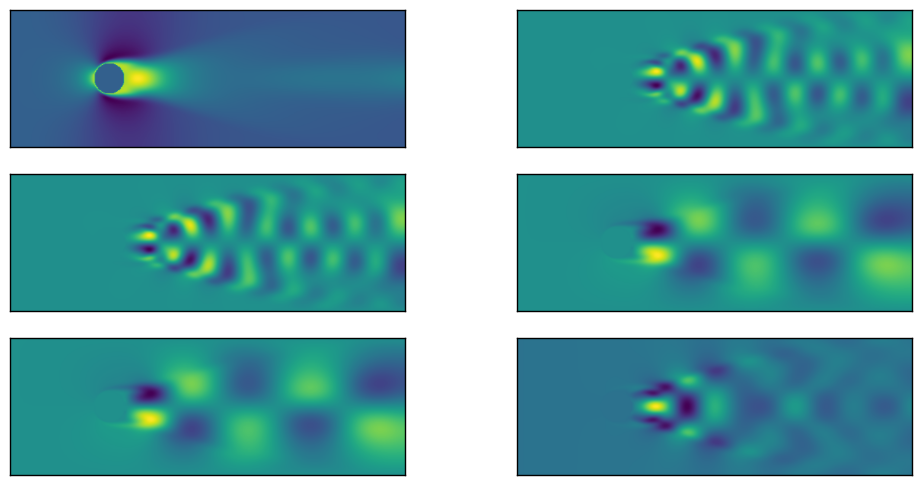

In [73]:
#--> Trace la composante de vitesse longitudinale des six premiers modes POD.
fig, ax = plt.subplots(3, 2, figsize=(12, 6))
ax[0, 0].imshow(dmd_modes[:, 0].reshape(mean_flow.shape)[0].T.real, cmap=plt.cm.viridis) ; ax[0, 0].xaxis.set_visible(False) ; ax[0, 0].yaxis.set_visible(False)
ax[0, 1].imshow(dmd_modes[:, 1].reshape(mean_flow.shape)[0].T.real, cmap=plt.cm.viridis) ; ax[0, 1].xaxis.set_visible(False) ; ax[0, 1].yaxis.set_visible(False)
ax[1, 0].imshow(dmd_modes[:, 2].reshape(mean_flow.shape)[0].T.real, cmap=plt.cm.viridis) ; ax[1, 0].xaxis.set_visible(False) ; ax[1, 0].yaxis.set_visible(False)
ax[1, 1].imshow(dmd_modes[:, 3].reshape(mean_flow.shape)[0].T.real, cmap=plt.cm.viridis) ; ax[1, 1].xaxis.set_visible(False) ; ax[1, 1].yaxis.set_visible(False)
ax[2, 0].imshow(dmd_modes[:, 4].reshape(mean_flow.shape)[0].T.real, cmap=plt.cm.viridis) ; ax[2, 0].xaxis.set_visible(False) ; ax[2, 0].yaxis.set_visible(False)
ax[2, 1].imshow(dmd_modes[:, 5].reshape(mean_flow.shape)[0].T.real, cmap=plt.cm.viridis) ; ax[2, 1].xaxis.set_visible(False) ; ax[2, 1].yaxis.set_visible(False)